In [1]:
!pip install jsonlines


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import jsonlines
import pandas as pd
import numpy as np

In [2]:
text = []

n = 0
with jsonlines.open(r"ranking_train.jsonl", 'r') as reader:
    for obj in  reader:
        n += 1
        text.append(obj)
        if n == 100:
            break

In [3]:
'''Формат данных следующий... Сначала по ключу 'text' выдаёт тело поста; по ключу 'comments' получаем список, состоящий из словарей следующего вида - по ключу 'text' выдаёт 
тело комментария, а по ключу 'score' получаем оценку от 0 до 4'''
len(text) 

100

In [4]:
print('Пример вызова тела поста: {}'.format(text[0]['text']) )

Пример вызова тела поста: How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?


In [5]:
text[0]

{'text': 'How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?',
 'comments': [{'text': 'Going back to school is not identical with giving up. Some founders go back to school and keep working on the startup while there.  However, those do so much worse than the people who work on the startup full-time that going back to school seems, in practice, not too far removed from a death sentence for a startup.Off the top of my head, I\'d guess we\'ve had about 8 startups where the founders went back to school.  It doesn\'t only happen with summer batches.  Founders from winter batches do it too.Usually the reason is that the startup isn\'t doing very well. However, that judgement depends a lot on how determined the founders are.  One reason we now shy away from funding people still in school is that they often unconsciously want the startup to fail, because the idea of dropping out frightens them.A lot of startups loo

In [6]:
print('Пример вызова тела комментариев: {}'.format(text[0]['comments']) )

Пример вызова тела комментариев: [{'text': 'Going back to school is not identical with giving up. Some founders go back to school and keep working on the startup while there.  However, those do so much worse than the people who work on the startup full-time that going back to school seems, in practice, not too far removed from a death sentence for a startup.Off the top of my head, I\'d guess we\'ve had about 8 startups where the founders went back to school.  It doesn\'t only happen with summer batches.  Founders from winter batches do it too.Usually the reason is that the startup isn\'t doing very well. However, that judgement depends a lot on how determined the founders are.  One reason we now shy away from funding people still in school is that they often unconsciously want the startup to fail, because the idea of dropping out frightens them.A lot of startups look bad after 3 months.  Someone who\'s out of school and has to make it work or get a job in a cubicle will say "don\'t wor

In [7]:
pd_data = pd.DataFrame(columns = ['post', 'comment', 'score'])
i=0
for body in text:
    for comment in body['comments']:
        pd_data.loc[i] = [body['text'].lower(), comment['text'].lower(), comment['score']]
        i+=1

In [8]:
pd_data.shape

(500, 3)

In [9]:
pd_data


,post,comment,score
0,how many summer y combinator fundees decided n...,going back to school is not identical with giv...,0
1,how many summer y combinator fundees decided n...,there will invariably be those who don't see t...,1
2,how many summer y combinator fundees decided n...,for me school is a way to be connected to what...,2
3,how many summer y combinator fundees decided n...,i guess it really depends on how hungry you ar...,3
4,how many summer y combinator fundees decided n...,i know pollground decided to go back to school...,4
...,...,...,...
495,web4.0 -- the semantic web,i like the note about privacy. i believe it --...,0
496,web4.0 -- the semantic web,tbl has been touting the coming of a semantic ...,1
497,web4.0 -- the semantic web,the world godin presents is definitely scary f...,2
498,web4.0 -- the semantic web,some of the example applications he gave kick ...,3


In [10]:
'''Перегонка датафрейма в CSV. Этот файл уже висит в репо'''
# pd_data.to_csv (r'my_data.csv', index= False )

'Перегонка датафрейма в CSV. Этот файл уже висит в репо'

In [11]:
from transformers import pipeline

clf = pipeline(
    task = 'sentiment-analysis', 
    model = 'SamLowe/roberta-base-go_emotions', 
    tokenizer = 'SamLowe/roberta-base-go_emotions', 
    max_length=512, truncation=True, top_k=None)


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [134]:
comments = list(pd_data['comment'])
result = clf(comments[:500])

In [135]:
result[0]

[{'label': 'neutral', 'score': 0.5654855966567993},
 {'label': 'disapproval', 'score': 0.09707435965538025},
 {'label': 'disappointment', 'score': 0.06673616915941238},
 {'label': 'realization', 'score': 0.055550940334796906},
 {'label': 'approval', 'score': 0.042356040328741074},
 {'label': 'fear', 'score': 0.039897359907627106},
 {'label': 'annoyance', 'score': 0.032051149755716324},
 {'label': 'sadness', 'score': 0.015312434174120426},
 {'label': 'optimism', 'score': 0.01422203704714775},
 {'label': 'nervousness', 'score': 0.011053076945245266},
 {'label': 'confusion', 'score': 0.008190988563001156},
 {'label': 'disgust', 'score': 0.004833351355046034},
 {'label': 'caring', 'score': 0.004682396072894335},
 {'label': 'embarrassment', 'score': 0.0032306183129549026},
 {'label': 'relief', 'score': 0.0020778824109584093},
 {'label': 'desire', 'score': 0.001996394479647279},
 {'label': 'anger', 'score': 0.0019004559144377708},
 {'label': 'admiration', 'score': 0.0014069766039028764},
 {'

In [136]:
# find all labels in result[0]
labels = []
for _dict in result[0]:
    labels.append(_dict['label'])

In [137]:
labels

['neutral',
 'disapproval',
 'disappointment',
 'realization',
 'approval',
 'fear',
 'annoyance',
 'sadness',
 'optimism',
 'nervousness',
 'confusion',
 'disgust',
 'caring',
 'embarrassment',
 'relief',
 'desire',
 'anger',
 'admiration',
 'surprise',
 'curiosity',
 'grief',
 'joy',
 'remorse',
 'amusement',
 'excitement',
 'pride',
 'love',
 'gratitude']

In [138]:
# create df with all labels as columns
df = pd.DataFrame(columns=labels)

In [139]:
df

,neutral,disapproval,disappointment,realization,approval,fear,annoyance,sadness,optimism,nervousness,...,surprise,curiosity,grief,joy,remorse,amusement,excitement,pride,love,gratitude


In [140]:
# add 500 rows to df with all 0
for i in range(500):
    df.loc[i] = [0]*len(labels)

df

,neutral,disapproval,disappointment,realization,approval,fear,annoyance,sadness,optimism,nervousness,...,surprise,curiosity,grief,joy,remorse,amusement,excitement,pride,love,gratitude
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
print("lol")

lol


In [142]:
for i, _list in enumerate(result):
    for _dict in _list:
        # add to row i in column _dict['label'] value _dict['score']
        df.loc[i, _dict['label']] = _dict['score']

In [143]:
df
        

,neutral,disapproval,disappointment,realization,approval,fear,annoyance,sadness,optimism,nervousness,...,surprise,curiosity,grief,joy,remorse,amusement,excitement,pride,love,gratitude
0,0.565486,0.097074,0.066736,0.055551,0.042356,0.039897,0.032051,0.015312,0.014222,0.011053,...,0.001362,0.001136,0.000992,0.000962,0.000792,0.000749,0.000705,0.000508,0.000466,0.000269
1,0.395560,0.007805,0.002881,0.012505,0.321902,0.000796,0.006816,0.001096,0.156702,0.000532,...,0.000561,0.002826,0.000471,0.001219,0.000617,0.000451,0.003475,0.003032,0.002543,0.005895
2,0.160460,0.009316,0.013246,0.174948,0.411931,0.001665,0.006653,0.001350,0.052027,0.001717,...,0.004499,0.033241,0.000644,0.004122,0.000993,0.001393,0.005259,0.002254,0.003625,0.001522
3,0.512539,0.004169,0.001803,0.009897,0.382080,0.000606,0.002766,0.000781,0.137098,0.000463,...,0.000692,0.014653,0.000267,0.002378,0.000421,0.000613,0.006291,0.000836,0.005039,0.001517
4,0.925078,0.005729,0.013700,0.031197,0.034817,0.000863,0.007146,0.005293,0.005273,0.000490,...,0.000524,0.000762,0.000492,0.001070,0.000678,0.001384,0.000661,0.000347,0.001081,0.000720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.084920,0.014215,0.003057,0.011591,0.403922,0.001469,0.005357,0.001664,0.028091,0.000907,...,0.004215,0.640696,0.000454,0.002803,0.001407,0.001376,0.011617,0.000394,0.067359,0.002075
496,0.048315,0.129801,0.597180,0.041262,0.049981,0.006920,0.028729,0.047335,0.023108,0.011859,...,0.057132,0.056579,0.003256,0.004014,0.012061,0.001176,0.008061,0.001178,0.303379,0.001190
497,0.202947,0.019403,0.013732,0.060404,0.072602,0.514064,0.010084,0.009549,0.009940,0.040682,...,0.002317,0.001333,0.001503,0.002314,0.000992,0.001315,0.002622,0.001313,0.001708,0.000897
498,0.495412,0.020943,0.023828,0.006532,0.009179,0.000887,0.374814,0.002944,0.001628,0.000295,...,0.001112,0.000666,0.000402,0.000800,0.000370,0.004379,0.000720,0.000518,0.000637,0.000628


In [120]:
# made pca for df with 500 rows and 28 columns (28 emotions) 
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(df)
pca.n_components_

9

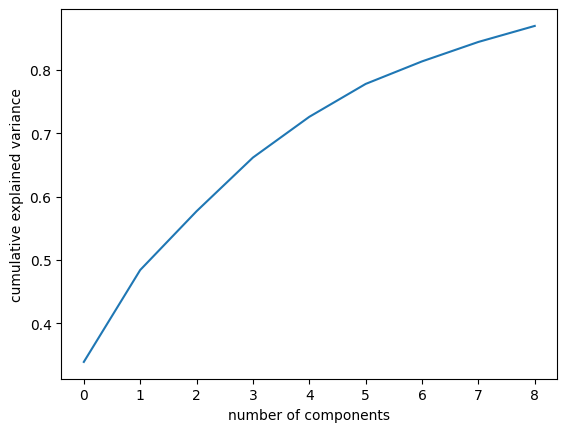

In [121]:
# draw graph
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [127]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
clf1 = pipeline(
    task = 'sentiment-analysis', 
    model = model_name, 
    tokenizer = model_name, 
    max_length=512, truncation=True, top_k=None)

result1 = clf1(comments[:499])


c:\Users\salak\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\salak\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [128]:
result1

[[{'label': 'NEGATIVE', 'score': 0.9990154504776001},
  {'label': 'POSITIVE', 'score': 0.0009845204185694456}],
 [{'label': 'NEGATIVE', 'score': 0.5725430250167847},
  {'label': 'POSITIVE', 'score': 0.42745697498321533}],
 [{'label': 'POSITIVE', 'score': 0.9977217316627502},
  {'label': 'NEGATIVE', 'score': 0.002278196392580867}],
 [{'label': 'NEGATIVE', 'score': 0.9319319128990173},
  {'label': 'POSITIVE', 'score': 0.06806807965040207}],
 [{'label': 'NEGATIVE', 'score': 0.9983745813369751},
  {'label': 'POSITIVE', 'score': 0.0016253384528681636}],
 [{'label': 'POSITIVE', 'score': 0.9974452257156372},
  {'label': 'NEGATIVE', 'score': 0.0025548392441123724}],
 [{'label': 'NEGATIVE', 'score': 0.9975752234458923},
  {'label': 'POSITIVE', 'score': 0.0024247756227850914}],
 [{'label': 'NEGATIVE', 'score': 0.9988937973976135},
  {'label': 'POSITIVE', 'score': 0.0011062446283176541}],
 [{'label': 'NEGATIVE', 'score': 0.9990555644035339},
  {'label': 'POSITIVE', 'score': 0.0009443801245652139}

In [147]:
# create nn model for classification of comments as input use df with 500 rows and 28 columns (28 emotions)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df
y = pd_data['score'][:500]

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(28,28,28),max_iter=500)
mlp.fit(X_train,y_train)

predictions = mlp.predict(X_test)

# print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.12      0.07      0.09        28
           1       0.16      0.22      0.19        23
           2       0.32      0.29      0.30        24
           3       0.19      0.16      0.17        25
           4       0.26      0.36      0.31        25

    accuracy                           0.22       125
   macro avg       0.21      0.22      0.21       125
weighted avg       0.21      0.22      0.21       125



c:\Users\salak\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


cpu


KeyError: 166